<a href="https://colab.research.google.com/github/lineality/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module4-sequence-your-narrative/GGA_asnmt_v03_LS_DS_124_Sequence_your_narrative_Geoffrey_Gordon_Ashbrook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Geoffrey Gordon Ashbrook Assignment 2019.09.21 
**_Lambda** School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [0]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [0]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load & look at data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [0]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [0]:
income.head(2)

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603


In [0]:
lifespan.head(2)

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42


In [0]:
population.head(2)

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000


In [0]:
pd.options.display.max_columns = 500
entities.head(2)

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.5,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america


In [0]:
concepts.head(2)

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder.org/gapminder-world/docu...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder.org/data/documentation/g...,population


## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [0]:
merged = pd.merge(income, lifespan)

In [0]:
pd.options.display.max_rows = 500
merged = pd.merge(income, lifespan, how='outer', on=['geo', 'time'])
merged.shape

(50446, 4)

In [0]:
# checking for duplicates using subset  
merged.duplicated(subset=['geo', 'time']).value_counts()

False    50446
dtype: int64

In [0]:
# checking
# Count number of unique values in specific column
# if final number not match num_rows of column
# then duplicates extant
merged['geo'].nunique()


216

In [0]:
#left-merging
merged = pd.merge(income,lifespan, how='left', on=['geo', 'time'])

In [0]:
merged.shape  

(46513, 4)

In [0]:
merged.head(2)

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,afg,1800,603,28.21
1,afg,1801,603,28.20


In [0]:
#right merge
merged = pd.merge(income, lifespan, how='right', on=['geo', 'time'])

In [0]:
merged.shape  

(44370, 4)

In [0]:
merged.head(2)

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,afg,1800,603.0,28.21
1,afg,1801,603.0,28.20


In [0]:
merged = pd.merge(income, lifespan)

In [0]:
merged.shape  

(40437, 4)

In [0]:
merged.head(2)

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,afg,1800,603,28.21
1,afg,1801,603,28.20


In [0]:
merged.duplicated(subset=['geo', 'time']).value_counts()

False    40437
dtype: int64

In [0]:
df = pd.merge(merged, population)

In [0]:
merged.shape 

(40437, 4)

In [0]:
merged.head(2)

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,afg,1800,603,28.21
1,afg,1801,603,28.20


In [0]:
df = pd.merge(df, 
              entities[['country', 'name', 'world_4region', 'world_6region',]],
              left_on='geo', right_on='country')

In [0]:
df.shape

(40437, 9)

In [0]:
df.head(2)

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_4region,world_6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia


In [0]:
# Adding spaces and captialization
df = df.rename(columns = {
    'geo': 'Geo',
    'country': 'Country Code',
    'time': 'Year', 
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'Income', 
    'life_expectancy_years': 'Lifespan',
    'population_total': 'Population',
    'name': 'Country',
    'world_6region': 'Region 6',
    'world_4region': 'Region 4'
})


In [0]:
df.head(2)

,Geo,Year,Income,Lifespan,Population,Country Code,Country,Region 4,Region 6
0,afg,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia


## Explore data

In [0]:
df.dtypes

Geo              object
Year              int64
Income            int64
Lifespan        float64
Population        int64
Country Code     object
Country          object
Region 4         object
Region 6         object
dtype: object

In [0]:
df.describe()

,Year,Income,Lifespan,Population
count,40437.000000,40437.000000,40437.000000,4.043700e+04
mean,1909.292900,4619.492717,43.132080,1.371204e+07
std,63.308682,10209.571045,16.313228,6.606335e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,876.000000,31.160000,4.113310e+05
50%,1909.000000,1442.000000,35.500000,1.985952e+06
75%,1964.000000,3488.000000,55.970000,6.499707e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [0]:
df.describe(exclude='number')

,Geo,Country Code,Country,Region 4,Region 6
count,40437,40437,40437,40437,40437
unique,187,187,187,4,6
top,ner,ner,Myanmar,africa,europe_central_asia
freq,219,219,219,11826,10778


In [0]:
usa = df[df.Country == 'United States']
usa.head()

,Geo,Year,Income,Lifespan,Population,Country Code,Country,Region 4,Region 6
38028,usa,1800,2127,39.41,6801854,usa,United States,americas,america
38029,usa,1801,2167,39.41,6933517,usa,United States,americas,america
38030,usa,1802,2202,39.41,7067728,usa,United States,americas,america
38031,usa,1803,2166,39.41,7204538,usa,United States,americas,america
38032,usa,1804,2165,39.41,7343995,usa,United States,americas,america


In [0]:
usa.describe()

,Year,Income,Lifespan,Population
count,219.000000,219.000000,219.000000,2.190000e+02
mean,1909.000000,14572.936073,54.846256,1.163662e+08
std,63.364028,15066.042247,15.202079,9.738644e+07
min,1800.000000,2113.000000,31.000000,6.801854e+06
25%,1854.500000,3512.500000,39.410000,2.752198e+07
50%,1909.000000,7989.000000,51.780000,9.236198e+07
75%,1963.500000,20090.500000,70.270000,1.962540e+08
max,2018.000000,54898.000000,79.140000,3.267667e+08


In [0]:
usa[usa.Year.isin([1818,1918,2018])]

,Geo,Year,Income,Lifespan,Population,Country Code,Country,Region 4,Region 6
38046,usa,1818,2258,39.41,9879049,usa,United States,americas,america
38146,usa,1918,9371,47.18,106721812,usa,United States,americas,america
38246,usa,2018,54898,79.14,326766748,usa,United States,americas,america


In [0]:
china = df[df.Country=='China']
china[china.Year.isin([1818,1918,2018])]

,Geo,Year,Income,Lifespan,Population,Country Code,Country,Region 4,Region 6
6854,chn,1818,985,32.00,374161494,chn,China,asia,east_asia_pacific
6954,chn,1918,989,22.13,462444535,chn,China,asia,east_asia_pacific
7054,chn,2018,16018,76.92,1415045928,chn,China,asia,east_asia_pacific


## Plot visualization

In [0]:
import seaborn as sns

In [0]:
now = df[df.Year == 2018]
then = df[df.Year == 1918]
now.head()

,Geo,Year,Income,Lifespan,Population,Country Code,Country,Region 4,Region 6
218,afg,2018,1867,58.69,36373176,afg,Afghanistan,asia,south_asia
437,ago,2018,5846,65.19,30774205,ago,Angola,africa,sub_saharan_africa
656,alb,2018,12424,78.01,2934363,alb,Albania,europe,europe_central_asia
922,are,2018,68231,76.89,9541615,are,United Arab Emirates,asia,middle_east_north_africa
1141,arg,2018,18942,76.97,44688864,arg,Argentina,americas,america


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)


(483.5453734847516, 100000)

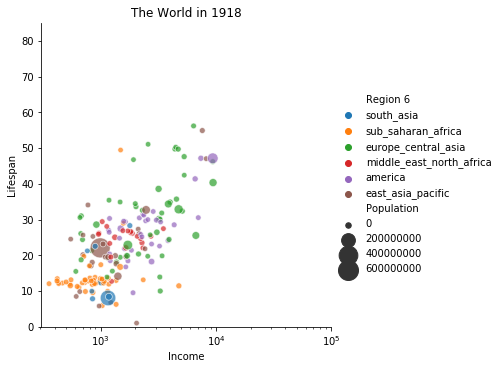

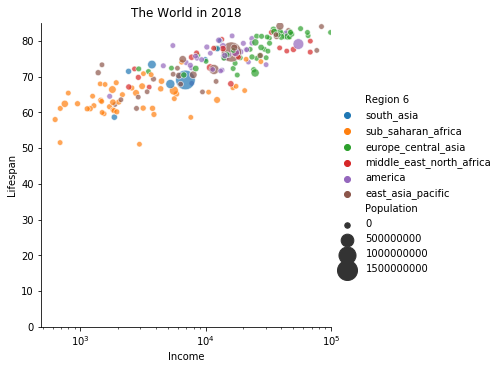

In [0]:
sns.relplot(x='Income', y='Lifespan', hue='Region 6', size='Population', 
            sizes=(30, 400), alpha=0.7, data=then)
plt.xscale('log')
plt.title("The World in 1918")
plt.ylim(0,85)
plt.xlim(0,100000)

sns.relplot(x='Income', y='Lifespan', hue='Region 6', size='Population', 
            sizes=(30, 400), alpha=0.7, data=now)
plt.xscale('log')
plt.title("The World in 2018")
plt.ylim(0,85)
plt.xlim(0,100000)

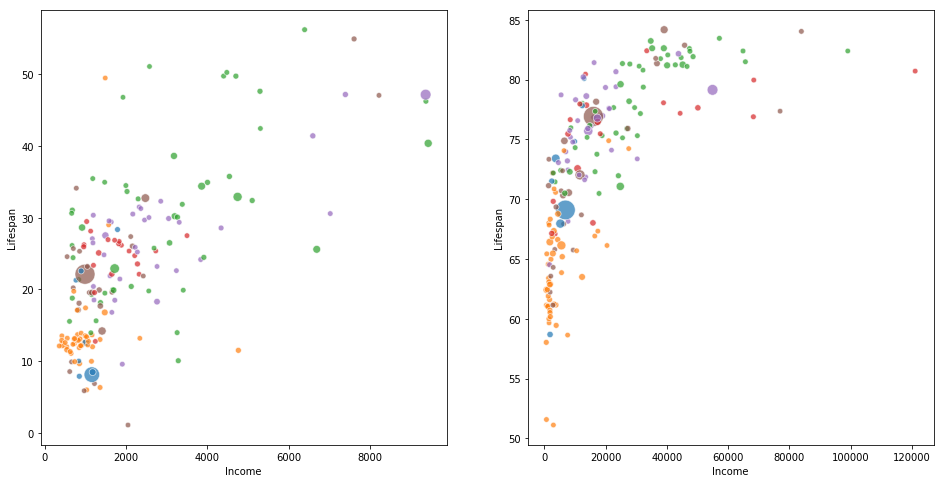

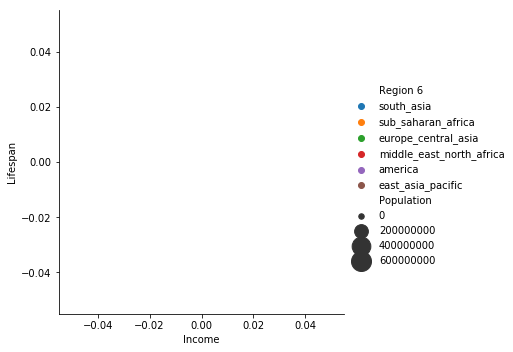

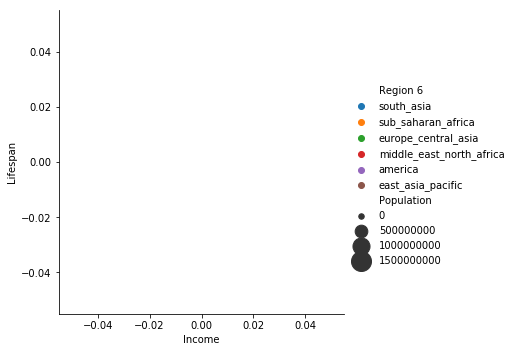

In [0]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

sns.relplot(x='Income', y='Lifespan', hue='Region 6', size='Population', 
            sizes=(30, 400), alpha=0.7, data=then, ax=ax[0]);

sns.relplot(x='Income', y='Lifespan', hue='Region 6', size='Population', 
            sizes=(30, 400), alpha=0.7, data=now, ax=ax[1]);

## Analyze outliers

In [0]:
# Qatar is the richest country in 2018
now.sort_values('Income', ascending=False)

In [0]:
now_qatar = now[now.Country=='Qatar']



In [0]:
now_qatar.shape

(1, 9)

In [0]:
now_qatar.head()

,Geo,Year,Income,Lifespan,Population,Country Code,Country,Region 4,Region 6
30362,qat,2018,121033,80.71,2694849,qat,Qatar,asia,middle_east_north_africa


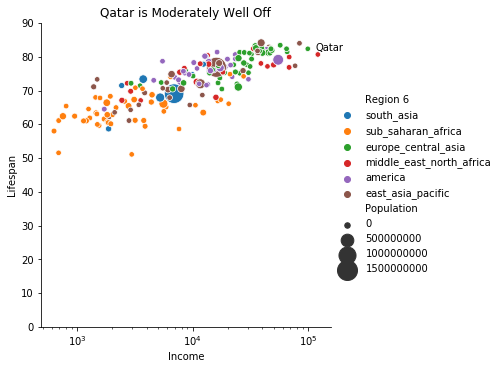

In [0]:
sns.relplot(x='Income', y='Lifespan', hue='Region 6', size='Population', 
            sizes=(30,400), data=now)
plt.xscale('log')
plt.ylim(0,90)
plt.title("Qatar is Moderately Well Off")
plt.text(x=now_qatar.Income-5000, y= now_qatar.Lifespan+1, s='Qatar')
plt.show()

## Plot multiple years

In [0]:
years = [1929, 1945, 1959]
centuries = df[df.Year.isin(years)]

centuries.head()

,Geo,Year,Income,Lifespan,Population,Country Code,Country,Region 4,Region 6
129,afg,1929,909,30.84,6334276,afg,Afghanistan,asia,south_asia
145,afg,1945,1007,31.72,7377241,afg,Afghanistan,asia,south_asia
159,afg,1959,1194,37.94,8834445,afg,Afghanistan,asia,south_asia
348,ago,1929,1651,32.01,3776276,ago,Angola,africa,sub_saharan_africa
364,ago,1945,2721,34.75,4307801,ago,Angola,africa,sub_saharan_africa


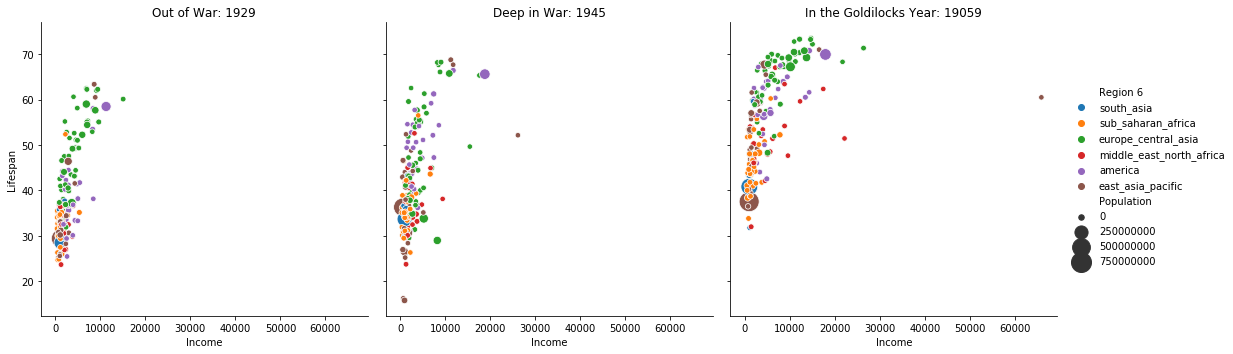

In [0]:
fig = sns.relplot(x='Income', y='Lifespan', hue='Region 6', size='Population', 
                  sizes=(30,400), col='Year', data=centuries)

axes = fig.axes.flatten()
axes[0].set_title('Out of War: 1929')
axes[1].set_title('Deep in War: 1945')
axes[2].set_title('In the Goldilocks Year: 19059');

## Point out a story

https://medium.com/wooden-information/critical-thinking-war-peace-inequality-prosperity-645ddbcf6720

The above link is to a datascience blog post of this project...

In [0]:
Years = [1890, 1912, 1919, 1928, 1934, 1944, 1959, 1971, 2018]

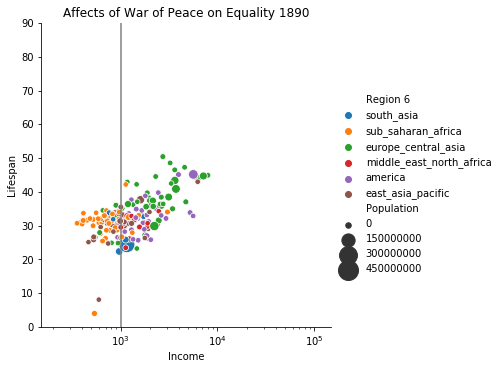

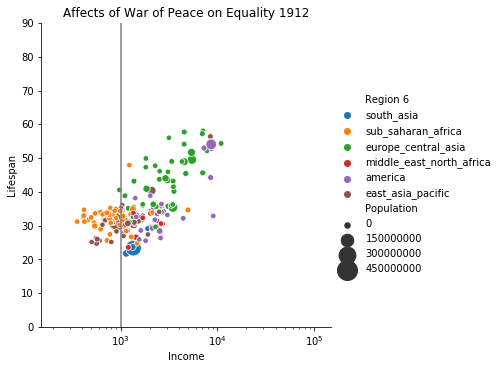

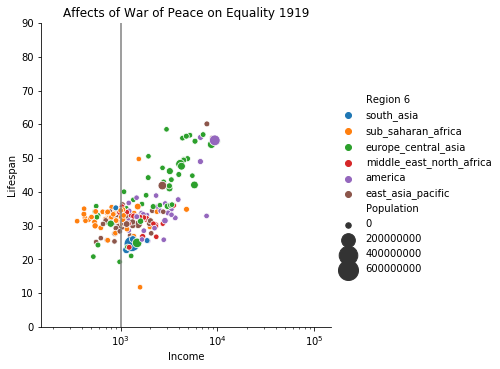

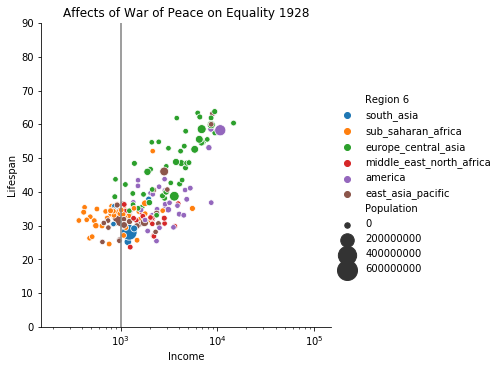

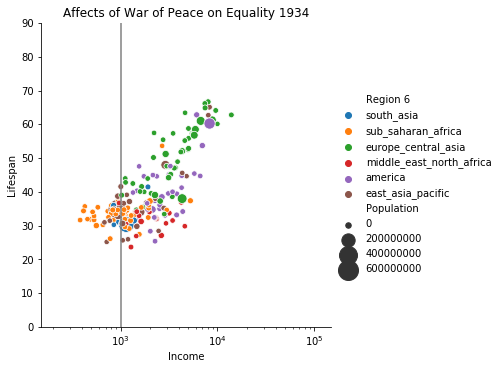

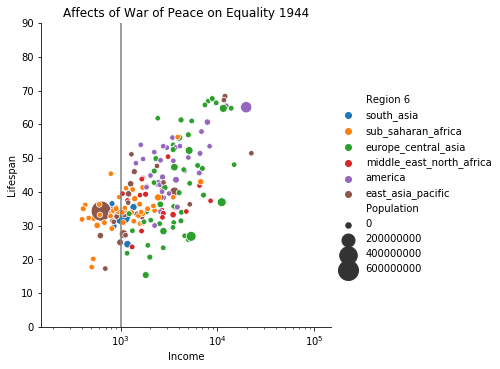

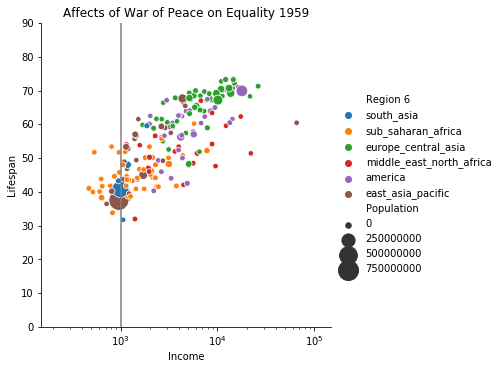

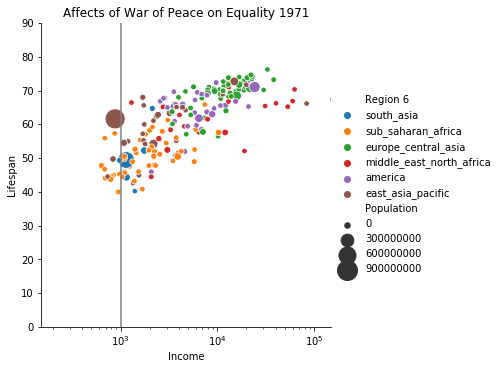

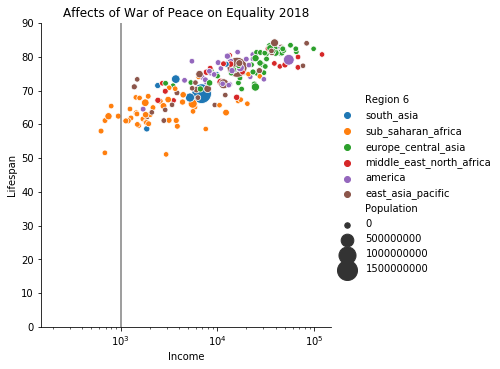

In [0]:
for year in Years:
  sns.relplot(x='Income', y='Lifespan', hue='Region 6', size='Population', 
              sizes=(30,400), data=df[df.Year==year])
  plt.xscale('log')
  plt.xlim((150, 150000))
  plt.ylim((0, 90))
  plt.title('Affects of War of Peace on Equality ' + str(year))
  plt.axvline(x=1000, color='grey')

Here is accompanying text, for easier reading see the blog line above. 

Watching this animated world map, try to guess which years are years of peaceful prosperity, and which are the years mired in war.
Can you see which is which?
Next, can you see how inequality corresponds to prosperity?
The point of this exercise is to challenge our inner hypothesis of what are meaningful proxies for quality of life, of what are causes and causal agents for changes in quality of life, by putting out assumptions to a test.
As yourself, regarding your hypotheses, the age old question:
How does that work?
How do you explain the rise in standard of living, the decrease in premature death, and the increase in prosperity, in terms of inequality?
The goal is to experience the realization that one cannot clearly see which are years of war or peace, and that inequality is, depending on how it is defined, perhaps inversely correlated with prosperity. At the very least, a brazen simplicity is not to be found.